In [106]:
import numpy as np
import pandas as pd
import read_model_ID_toy as model
import calculate_cleavage_rate_toy as clv
import matplotlib.pylab as plt
import sys
sys.path.append('../')
sys.path.append('../../code_Boyle')
import Nucleaseq_data_processing as processing
reload(model)
reload(clv)
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()

### load experimental data

In [40]:
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True)

kclv = []
kon = []
i = 1
while i < 20+1:
    for a in range(len(xdata)):
        if len(xdata[a])==1 and xdata[a][0]==i:
            kclv.append(ydata[a][0][0])
            kon.append(np.log10(ydata[a][1][0]))
            i = i + 1
    
kclv.append(ydata[0][0][0])
kclv = np.array(kclv)
kon.append(np.log10(ydata[0][1][0]))
kon = np.array(kon)



k_double = np.zeros([20,20])
k_double_on = np.zeros([20,20])

for a in range(len(xdata)):
    if len(xdata[a])==2:
        i = xdata[a][0]
        j = xdata[a][1]
        k_double[j-1,i-1] = (ydata[a][0][0])
        if len(ydata[a][1]) > 0:
            k_double_on[j-1,i-1] = np.log10(ydata[a][1][0])
        else:
            k_double_on[j-1,i-1] = np.nan
        
k_double_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_double_on_df = pd.DataFrame(k_double_on, index=range(1, 21), columns=range(1, 21))

### construct artificial parameter set and show landscape

1.7705877625835293


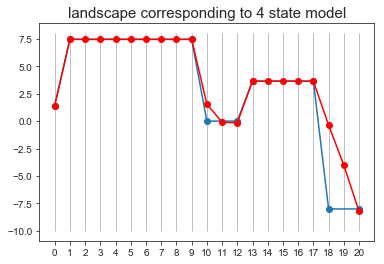

In [100]:
filename = 'fit_17_5_2019_sim_5.txt'
path = '../../fits_Stijn/17_5_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter 25']
final_par_np = np.array(final_par.values)
model_id = 'four_state_model_clv'

parameters = np.zeros(26)
parameters[0] = 1.4
parameters[1] = 8.
parameters[2] = 6.045
parameters[3] = 3.637
parameters[4:24] = final_par_np[2:22]
#parameters[20:24] = 2.
parameters[-2] = final_par_np[-2]-1
parameters[-1] = final_par_np[-1]


epsilon, forward_rates = model.unpack_parameters(parameters,model_id)
epsilontemp = np.cumsum(np.append(1.4, -epsilon[1:5]))
epsilontemp = np.append(epsilontemp[0],np.append([epsilontemp[0] + epsilon[5],epsilontemp[0] + epsilon[5]],epsilontemp[1:]))
epsilontemp = np.append(epsilontemp[0:5],np.append([epsilontemp[4] + epsilon[6],epsilontemp[4] + epsilon[6]],epsilontemp[5:]))

plt.plot([0,1,9,10,12,13,17,18,20],epsilontemp,marker='o')
plt.vlines(range(0,21),-10,8,linewidth=0.5,color='grey')
plt.xticks(range(0,21),range(0,21));
plt.title('landscape corresponding to 4 state model',fontsize=15)

landscape = np.zeros(21)
landscape[0] = 1.389248 #PAM Boyle, minus PAM Boyle :)
landscape[1:10] = np.ones(9)*7.44538973 #median height
landscape[10:13] = [1.547533, -0.105180, -0.153215] #well defined dip, from Boyle
landscape[13:18] = np.ones(5)*3.6374928 #median height
landscape[18:21] = [-0.361180,-4.009278,-8.223548] #well defined second dip, from Boyle

plt.plot(range(0,21),landscape,marker='o',color='red')

print forward_rates[1]*np.exp(-epsilon[6])

In [111]:
print clv.calc_cleavage_rate_fast(parameters,model_id,[])

print clv.calc_cleavage_rate_fast(parameters,model_id,[11])

forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 3.92938037e-02 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[-100.    -1.4   -0.    -8.    -0. ]
0.13206660818835442
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 3.92938037e-02 3.58967926e+04
 5.93966024e-04 6.72429083e+01]
MM-energies
[-100.           -1.4           6.28009167   -8.           -0.        ]
0.0026128599980447015


Text(34,0.5,'mismatch 2')

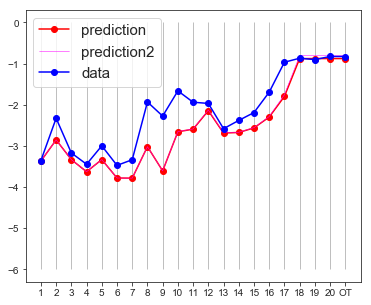

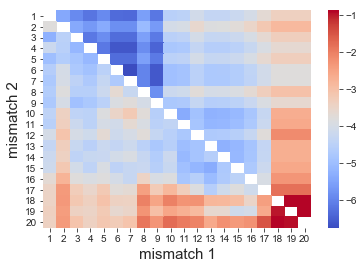

In [88]:
k = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1] = np.log10(clv.calc_cleavage_rate_fast(parameters,model_id,mismatch_positions))
k[-1] = np.log10(clv.calc_cleavage_rate_fast(parameters,model_id,[]))

k2 = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k2[i-1] = np.log10(clv.calc_cleavage_rate_slow(parameters,model_id,mismatch_positions))
k2[-1] = np.log10(clv.calc_cleavage_rate_slow(parameters,model_id,[]))

    
plt.figure(figsize=[6,5])
plt.plot(range(1,22),k,marker='o',color='red')
plt.plot(range(1,22),k2,color='magenta',linewidth=0.5)
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
plt.plot(range(1,22),kclv,marker='o',color='b')
plt.legend(['prediction','prediction2','data'],fontsize=15)

k_double = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1] = np.log10(clv.calc_cleavage_rate_fast(parameters,model_id,mismatch_positions))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_df = k_df + k_double_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    
plt.figure()
sns.heatmap(k_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

In [89]:
chi = 0.0

perfectClv = np.float(len(ydata[0]))
singleClv = 0.0
doubleClv = 0.0
for i in range(len(xdata)):
    if len(xdata[i])==1:
        singleClv += len(ydata[i])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv]

for i in range(len(xdata)):
    mismatch = xdata[i]
    chi += clv.calc_chi_squared(parameters,mismatch,ydata[i][0],yerr[i][0],chi_weights,False,model_id)
    
print chi

898.2711080617324


forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 1.42702096e+01 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[ 1.4         4.49486256 -0.         -8.         -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 1.42702096e+01 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[-100.            4.49486256   -0.           -8.           -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 4.36351380e+00 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[ 1.4         3.30996609 -0.         -8.         -0.        ]
forward
[1.00000000e+03 1.593442

forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 3.92938037e-02 6.72429083e+01
 2.64855855e-02 6.72429083e+01]
MM-energies
[ 1.4       -1.4       -0.        -4.2024662 -0.       ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 3.92938037e-02 6.72429083e+01
 2.64855855e-02 6.72429083e+01]
MM-energies
[-100.          -1.4         -0.          -4.2024662   -0.       ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 3.92938037e-02 6.72429083e+01
 5.93966024e-04 1.59814459e+03]
MM-energies
[ 1.4        -1.4        -0.         -8.          3.16828704]
forward
[1.00000000e+03 1.59344231e-01 6.7

[-100.            4.49486256    5.21009571   -8.           -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 1.42702096e+01 6.72429083e+01
 2.25551650e-01 6.72429083e+01]
MM-energies
[ 1.4         4.49486256 -0.         -2.06051766 -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 1.42702096e+01 6.72429083e+01
 2.25551650e-01 6.72429083e+01]
MM-energies
[-100.            4.49486256   -0.           -2.06051766   -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 1.42702096e+01 6.72429083e+01
 2.17795854e-01 6.72429083e+01]
MM-energies
[ 1.4         4.494862

[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 4.36351380e+00 4.15715200e+04
 5.93966024e-04 6.72429083e+01]
MM-energies
[ 1.4         3.30996609  6.42685904 -8.         -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 4.36351380e+00 4.15715200e+04
 5.93966024e-04 6.72429083e+01]
MM-energies
[-100.            3.30996609    6.42685904   -8.           -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 4.36351380e+00 3.58967926e+04
 5.93966024e-04 6.72429083e+01]
MM-energies
[ 1.4         3.30996609  6.28009167 -8.         -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -

forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 2.13879376e+03 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[ 1.4         9.50468572 -0.         -8.         -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 2.13879376e+03 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[-100.            9.50468572   -0.           -8.           -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 8.29765509e+03 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[ 1.4        10.86041667 -0.         -8.         -0.        ]
forward
[1.00000000e+03 1.593442

forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 2.45081063e+04 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[ 1.4        11.94344765 -0.         -8.         -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 2.45081063e+04 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[-100.           11.94344765   -0.           -8.           -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 4.20909402e+03 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[ 1.4        10.18169114 -0.         -8.         -0.        ]
forward
[1.00000000e+03 1.593442

[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 1.23139714e+04 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[-100.           11.25517822   -0.           -8.           -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 1.24130462e+04 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[ 1.4        11.26319175 -0.         -8.         -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 1.24130462e+04 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[-100.           11.26319175   -0.           -8.           -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -

[ 1.4       10.5317851 -0.        -8.        -0.       ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 5.97354996e+03 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[-100.          10.5317851   -0.          -8.          -0.       ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 2.31749588e+04 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[ 1.4        11.88751605 -0.         -8.         -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 2.31749588e+04 6.72429083e+01
 5.93966024e-04 6.72429083e+01]
MM-energies
[-100.           11.88751605   -

[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 3.71175212e+01 4.15715200e+04
 5.93966024e-04 6.72429083e+01]
MM-energies
[-100.            5.45077757    6.42685904   -8.           -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 3.71175212e+01 3.58967926e+04
 5.93966024e-04 6.72429083e+01]
MM-energies
[ 1.4         5.45077757  6.28009167 -8.         -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 3.71175212e+01 3.58967926e+04
 5.93966024e-04 6.72429083e+01]
MM-energies
[-100.            5.45077757    6.28009167   -8.           -0.        ]
forward
[3.98107171e

MM-energies
[ 1.4         3.68902106 -0.         -2.06051766 -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 6.37467190e+00 6.72429083e+01
 2.25551650e-01 6.72429083e+01]
MM-energies
[-100.            3.68902106   -0.           -2.06051766   -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 6.37467190e+00 6.72429083e+01
 2.17795854e-01 6.72429083e+01]
MM-energies
[ 1.4         3.68902106 -0.         -2.09550866 -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 6.37467190e+00 6.72429083e+01
 2.17795854e-01 6.72429083e+01]
MM-energies
[-100.    

[ 1.4         5.04475201 -0.         -4.2024662  -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 2.47311498e+01 6.72429083e+01
 2.64855855e-02 6.72429083e+01]
MM-energies
[-100.            5.04475201   -0.           -4.2024662    -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 2.47311498e+01 6.72429083e+01
 5.93966024e-04 1.59814459e+03]
MM-energies
[ 1.4         5.04475201 -0.         -8.          3.16828704]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 2.47311498e+01 6.72429083e+01
 5.93966024e-04 1.59814459e+03]
MM-energies
[-100.            5.04

[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 3.92938037e-02 3.58967926e+04
 2.25551650e-01 6.72429083e+01]
MM-energies
[-100.           -1.4           6.28009167   -2.06051766   -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 3.92938037e-02 3.58967926e+04
 2.17795854e-01 6.72429083e+01]
MM-energies
[ 1.4        -1.4         6.28009167 -2.09550866 -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 3.92938037e-02 3.58967926e+04
 2.17795854e-01 6.72429083e+01]
MM-energies
[-100.           -1.4           6.28009167   -2.09550866   -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -

[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 3.92938037e-02 6.72429083e+01
 8.27054282e+01 6.72429083e+01]
MM-energies
[ 1.4        -1.4        -0.          3.84397368 -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 3.92938037e-02 6.72429083e+01
 8.27054282e+01 6.72429083e+01]
MM-energies
[-100.           -1.4          -0.            3.84397368   -0.        ]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 3.92938037e-02 6.72429083e+01
 6.39300774e+01 6.72429083e+01]
MM-energies
[ 1.4        -1.4        -0.          3.58647838 -0.        ]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -

[0.00000000e+00 3.72007598e-41 3.92938037e-02 6.72429083e+01
 1.68352986e-01 1.59814459e+03]
MM-energies
[-100.           -1.4          -0.           -2.35300396    3.16828704]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.61440418e-02 3.92938037e-02 6.72429083e+01
 1.68352986e-01 3.06973968e+03]
MM-energies
[ 1.4        -1.4        -0.         -2.35300396  3.82103648]
forward
[1.00000000e+03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 6.25716801e+03]
OT-energies
[-100.    -1.4   -0.    -8.    -0. ]
backward
[0.00000000e+00 3.72007598e-41 3.92938037e-02 6.72429083e+01
 1.68352986e-01 3.06973968e+03]
MM-energies
[-100.           -1.4          -0.           -2.35300396    3.82103648]
forward
[3.98107171e-03 1.59344231e-01 6.72429083e+01 1.77058776e+00
 6.72429083e+01 0.00000000e+00]
OT-energies
[ 1.4 -1.4 -0.  -8.  -0. ]
backward
[0.00000000e+00 1.6144

Text(34,0.5,'mismatch 2')

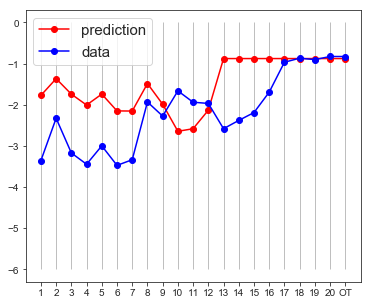

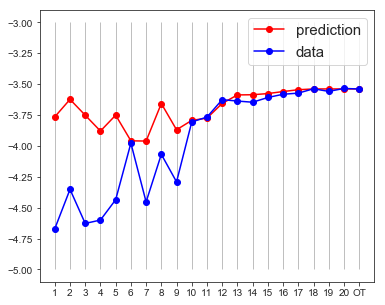

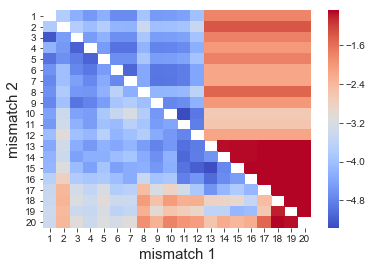

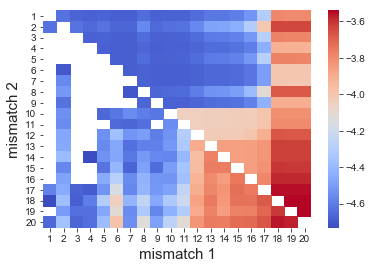

In [112]:
model_id = 'four_state_model_clv+four_state_model_on'
parameters_com = np.append(np.append([1.4],parameters[0:-2]),np.append([-2.4],parameters[-2:]))

k = np.zeros(21)
k2 = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1],k2[i-1] = np.log10(clv.calc_clv_on(parameters_com,model_id,mismatch_positions))
k[-1],k2[-1] = np.log10(clv.calc_clv_on(parameters_com,model_id,[]))
    
plt.figure(figsize=[6,5])
plt.plot(range(1,22),k,marker='o',color='red')
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
plt.plot(range(1,22),kclv,marker='o',color='b')
plt.legend(['prediction','data'],fontsize=15)

plt.figure(figsize=[6,5])
plt.plot(range(1,22),k2,marker='o',color='red')
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-5,-3,linewidth=0.5,color='grey')
plt.plot(range(1,22),kon,marker='o',color='b')
plt.legend(['prediction','data'],fontsize=15)

k_double = np.zeros([20,20])
k_double2 = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1],k_double2[i-1][j-1] = np.log10(clv.calc_clv_on(parameters_com,model_id,mismatch_positions))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_on_df = pd.DataFrame(k_double2, index=range(1, 21), columns=range(1, 21))

k_df = k_df + k_double_df
k_on_df = k_on_df + k_double_on_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    k_on_df[i].loc[i]=np.nan
    
plt.figure()
sns.heatmap(k_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

plt.figure()
sns.heatmap(k_on_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

In [ ]:
print calc_cleavage_rate(parameters,model_id,[11])
print calc_cleavage_rate2(parameters,model_id,[11])

In [26]:
def calc_cleavage_rate(parameters,model_id,mismatch_positions):
    
    epsilon,rates = model.unpack_parameters(parameters,model_id)
    if type(mismatch_positions)==type([]):
            mismatch_positions = np.array(mismatch_positions)

    new_epsilon = epsilon.copy()        
    energies_OT = -1*new_epsilon[0:5]
    energies_OT[0] *= -1 #PAM, I, 0, R, 0
    barrier1 = new_epsilon[5]
    barrier2 = new_epsilon[6]

    for i in mismatch_positions:
        if i < 10: #mismatch in the first barrier
            energies_OT[1] += new_epsilon[6+i]
            barrier1 += new_epsilon[6+i]
        elif i < 13: #mismatch in first flat part
            energies_OT[2] += new_epsilon[6+i]
        elif i < 18: #mismatch in second barrier
            energies_OT[3] += new_epsilon[6+i]
            barrier2 += new_epsilon[6+i]
        elif i <21: #mismatch in last flat part
            energies_OT[4] += new_epsilon[6+i]

    rates_OT = rates.copy()
    rates_OT[1] *= np.exp(-barrier1)
    rates_OT[2] *= np.exp(-energies_OT[2])
    rates_OT[3] *= np.exp(-barrier2)
    rates_OT[4] *= np.exp(-energies_OT[4])

    backward_OT = np.zeros(len(rates_OT))
    backward_OT[0] = 0.0 #no rate backward from solution
    backward_OT[1] = rates_OT[0]*np.exp(energies_OT[0]) #backward rate from PAM
    backward_OT[2] = rates_OT[1]*np.exp(energies_OT[1]) #backward rate over first barrier
    backward_OT[3] = rates_OT[2]*np.exp(energies_OT[2]) #backward rate over flat part
    backward_OT[4] = rates_OT[3]*np.exp(energies_OT[3]) #backward rate over second barrier
    backward_OT[5] = rates_OT[4]*np.exp(energies_OT[4]) #backward rate over flat part
    
    #combined rates
    forward_combined = np.zeros(4)
    forward_combined[0] = rates_OT[0]
    forward_combined[1] = (rates_OT[1]*rates_OT[2])/(rates_OT[1] + backward_OT[2] +rates_OT[2])
    forward_combined[2] = (rates_OT[3]*rates_OT[4])/(rates_OT[3] + backward_OT[4] +rates_OT[4])
    forward_combined[3] = rates_OT[5]

    backward_combined = np.zeros(4)
    backward_combined[0] = backward_OT[0]
    backward_combined[1] = backward_OT[1]
    backward_combined[2] = (backward_OT[3]*backward_OT[2])/(backward_OT[3] + rates_OT[2] + backward_OT[2])
    backward_combined[3] = (backward_OT[5]*backward_OT[4])/(backward_OT[5] + rates_OT[4] + backward_OT[4])
    
    diagonal1 = -(forward_combined + backward_combined)
    diagonal2 = backward_combined[1:]
    diagonal3 = forward_combined[:-1]
    # rate_matrix = np.zeros((len(forward_rates), len(forward_rates)))  # Build the matrix

    rate_matrix = np.diag(diagonal1, k=0) + np.diag(diagonal2, k=1) + np.diag(diagonal3, k=-1)

    M = -1 * rate_matrix
    Minv = np.linalg.inv(M)
    vec = np.ones(len(Minv))
    everything_unbound = np.array([1.0] + [0.0] * (3))
    MFPT = vec.dot(Minv.dot(everything_unbound))
    k = 1/MFPT
    
    return k

In [63]:
def calc_cleavage_rate2(parameters,model_id,mismatch_positions):
    
    epsilon,rates = model.unpack_parameters(parameters,model_id)
    if type(mismatch_positions)==type([]):
            mismatch_positions = np.array(mismatch_positions)

    new_epsilon = epsilon.copy()        
    energies_OT = -1*new_epsilon[0:5]
    energies_OT[0] *= -1 #PAM, I, 0, R, 0
    barrier1 = new_epsilon[5]
    barrier2 = new_epsilon[6]

    rates_OT = rates.copy()
    rates_OT[1] *= np.exp(-barrier1)
    rates_OT[2] *= np.exp(-energies_OT[2])
    rates_OT[3] *= np.exp(-barrier2)
    rates_OT[4] *= np.exp(-energies_OT[4])
    
    for i in mismatch_positions:
        if i < 10: #mismatch in the first barrier
            rates_OT[1] *= np.exp(-new_epsilon[6+i])
        elif i < 13: #mismatch in first flat part
            rates_OT[2] *= np.exp(-new_epsilon[6+i])
        elif i < 18: #mismatch in second barrier
            rates_OT[3] *= np.exp(-new_epsilon[6+i])
            barrier2 += new_epsilon[6+i]
        elif i <21: #mismatch in last flat part
            rates_OT[4] *= np.exp(-new_epsilon[6+i])

    backward_OT = np.zeros(len(rates_OT))
    backward_OT[0] = 0.0 #no rate backward from solution
    backward_OT[1] = rates_OT[0]*np.exp(energies_OT[0]) #backward rate from PAM
    backward_OT[2] = rates_OT[1]*np.exp(energies_OT[1]) #backward rate over first barrier
    backward_OT[3] = rates_OT[2]*np.exp(energies_OT[2]) #backward rate over flat part
    backward_OT[4] = rates_OT[3]*np.exp(energies_OT[3]) #backward rate over second barrier
    backward_OT[5] = rates_OT[4]*np.exp(energies_OT[4]) #backward rate over flat part

    #combined rates
    forward_combined = np.zeros(4)
    forward_combined[0] = rates_OT[0]
    forward_combined[1] = (rates_OT[1]*rates_OT[2])/(rates_OT[1] + backward_OT[2] +rates_OT[2])
    forward_combined[2] = (rates_OT[3]*rates_OT[4])/(rates_OT[3] + backward_OT[4] +rates_OT[4])
    forward_combined[3] = rates_OT[5]

    backward_combined = np.zeros(4)
    backward_combined[0] = backward_OT[0]
    backward_combined[1] = backward_OT[1]
    backward_combined[2] = (backward_OT[3]*backward_OT[2])/(backward_OT[3] + rates_OT[2] + backward_OT[2])
    backward_combined[3] = (backward_OT[5]*backward_OT[4])/(backward_OT[5] + rates_OT[4] + backward_OT[4])

    diagonal1 = -(forward_combined + backward_combined)
    diagonal2 = backward_combined[1:]
    diagonal3 = forward_combined[:-1]
    # rate_matrix = np.zeros((len(forward_rates), len(forward_rates)))  # Build the matrix

    rate_matrix = np.diag(diagonal1, k=0) + np.diag(diagonal2, k=1) + np.diag(diagonal3, k=-1)

    M = -1 * rate_matrix
    Minv = np.linalg.inv(M)
    vec = np.ones(len(Minv))
    everything_unbound = np.array([1.0] + [0.0] * (3))
    MFPT = vec.dot(Minv.dot(everything_unbound))
    k = 1/MFPT
    
    return k

#### On-target cleavage rate using four state model

In [ ]:
if type(mismatch_positions)==type([]):
        mismatch_positions = np.array(mismatch_positions)

new_epsilon = epsilon.copy()        
energies_OT = -1*new_epsilon[0:5]
energies_OT[0] *= -1 #PAM, I, 0, R, 0
barrier1 = new_epsilon[5]
barrier2 = new_epsilon[6]

print 'energies'
print energies_OT
print ''
print 'barriers'
print barrier1
print barrier2
print ''

energies_MM = energies_OT.copy()
#for i in mismatch_positions:
#    if i < 10: #mismatch in the first barrier
#        energies_MM[1] += new_epsilon[4+i]
#        energies_MM[2] += new_epsilon[4+i]
#        barrier1 += new_epsilon[4+i]

rates_OT = rates.copy()
rates_OT[1] *= np.exp(-barrier1)
rates_OT[2] *= np.exp(-energies_OT[2])
rates_OT[3] *= np.exp(-barrier2)
rates_OT[4] *= np.exp(-energies_OT[4])

print 'rates'
print rates_OT

backward_OT = np.zeros(len(rates_OT))
backward_OT[0] = 0.0 #no rate backward from solution
backward_OT[1] = rates_OT[0]*np.exp(energies_OT[0]) #backward rate from PAM
backward_OT[2] = rates_OT[1]*np.exp(energies_OT[1]) #backward rate over first barrier
backward_OT[3] = rates_OT[2]*np.exp(energies_OT[2]) #backward rate over flat part
backward_OT[4] = rates_OT[3]*np.exp(energies_OT[3]) #backward rate over second barrier
backward_OT[5] = rates_OT[4]*np.exp(energies_OT[4]) #backward rate over flat part

print backward_OT
print ''

#combined rates
forward_combined = np.zeros(4)
forward_combined[0] = rates_OT[0]
forward_combined[1] = (rates_OT[1]*rates_OT[2])/(rates_OT[1] + backward_OT[2] +rates_OT[2])
forward_combined[2] = (rates_OT[3]*rates_OT[4])/(rates_OT[3] + backward_OT[4] +rates_OT[4])
forward_combined[3] = rates_OT[5]

backward_combined = np.zeros(4)
backward_combined[0] = backward_OT[0]
backward_combined[1] = backward_OT[1]
backward_combined[2] = (backward_OT[3]*backward_OT[2])/(backward_OT[3] + rates_OT[2] + backward_OT[2])
backward_combined[3] = (backward_OT[5]*backward_OT[4])/(backward_OT[5] + rates_OT[4] + backward_OT[4])

print 'combined rates'
print forward_combined
print backward_combined
print ''

diagonal1 = -(forward_combined + backward_combined)
diagonal2 = backward_combined[1:]
diagonal3 = forward_combined[:-1]
# rate_matrix = np.zeros((len(forward_rates), len(forward_rates)))  # Build the matrix

rate_matrix = np.diag(diagonal1, k=0) + np.diag(diagonal2, k=1) + np.diag(diagonal3, k=-1)

print 'matrix'
print rate_matrix
print ''

M = -1 * rate_matrix
Minv = np.linalg.inv(M)
vec = np.ones(len(Minv))
everything_unbound = np.array([1.0] + [0.0] * (3))
MFPT = vec.dot(Minv.dot(everything_unbound))
k = 1/MFPT

print 'prediction'
print k

In [ ]:
k = np.zeros(20)
for i in range(1,21):
    mismatch_positions = [i]

    if type(mismatch_positions)==type([]):
            mismatch_positions = np.array(mismatch_positions)

    new_epsilon = epsilon.copy()        
    energies_OT = -1*new_epsilon[0:5]
    energies_OT[0] *= -1 #PAM, I, 0, R, 0
    barrier1 = new_epsilon[5]
    barrier2 = new_epsilon[6]

    for i in mismatch_positions:
        if i < 10: #mismatch in the first barrier
            energies_OT[1] += new_epsilon[6+i]
            barrier1 += new_epsilon[6+i]
        elif i < 13: #mismatch in first flat part
            energies_OT[2] += new_epsilon[6+i]
        elif i < 18: #mismatch in second barrier
            energies_OT[3] += new_epsilon[6+i]
            barrier2 += new_epsilon[6+i]
        elif i <21: #mismatch in last flat part
            energies_OT[4] += new_epsilon[6+i]

    rates_OT = rates.copy()
    rates_OT[1] *= np.exp(-barrier1)
    rates_OT[2] *= np.exp(-energies_OT[2])
    rates_OT[3] *= np.exp(-barrier2)
    rates_OT[4] *= np.exp(-energies_OT[4])

    backward_OT = np.zeros(len(rates_OT))
    backward_OT[0] = 0.0 #no rate backward from solution
    backward_OT[1] = rates_OT[0]*np.exp(energies_OT[0]) #backward rate from PAM
    backward_OT[2] = rates_OT[1]*np.exp(energies_OT[1]) #backward rate over first barrier
    backward_OT[3] = rates_OT[2]*np.exp(energies_OT[2]) #backward rate over flat part
    backward_OT[4] = rates_OT[3]*np.exp(energies_OT[3]) #backward rate over second barrier
    backward_OT[5] = rates_OT[4]*np.exp(energies_OT[4]) #backward rate over flat part

    #combined rates
    forward_combined = np.zeros(4)
    forward_combined[0] = rates_OT[0]
    forward_combined[1] = (rates_OT[1]*rates_OT[2])/(rates_OT[1] + backward_OT[2] +rates_OT[2])
    forward_combined[2] = (rates_OT[3]*rates_OT[4])/(rates_OT[3] + backward_OT[4] +rates_OT[4])
    forward_combined[3] = rates_OT[5]

    backward_combined = np.zeros(4)
    backward_combined[0] = backward_OT[0]
    backward_combined[1] = backward_OT[1]
    backward_combined[2] = (backward_OT[3]*backward_OT[2])/(backward_OT[3] + rates_OT[2] + backward_OT[2])
    backward_combined[3] = (backward_OT[5]*backward_OT[4])/(backward_OT[5] + rates_OT[4] + backward_OT[4])

    diagonal1 = -(forward_combined + backward_combined)
    diagonal2 = backward_combined[1:]
    diagonal3 = forward_combined[:-1]
    # rate_matrix = np.zeros((len(forward_rates), len(forward_rates)))  # Build the matrix

    rate_matrix = np.diag(diagonal1, k=0) + np.diag(diagonal2, k=1) + np.diag(diagonal3, k=-1)

    M = -1 * rate_matrix
    Minv = np.linalg.inv(M)
    vec = np.ones(len(Minv))
    everything_unbound = np.array([1.0] + [0.0] * (3))
    MFPT = vec.dot(Minv.dot(everything_unbound))
    k[i-1] = 1/MFPT

print k
plt.figure(figsize=[6,5])
plt.semilogy(range(1,21),k,marker='o',color='red')
plt.xticks(range(1,21),range(1,21));
plt.vlines(range(1,21),10**-3,1,linewidth=0.5,color='grey')